# Intro to F1 

Jupyter Notebook
- 'm' convert cell to markdown
- 'a' insert cell above
- 'dd' delete cell
- 'b' insrert cell below
- 'Shift + enter' runs the block and move to next one

In [1]:
import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection

import numpy as np
import pandas as pd


In [2]:

# Enable the cache by providing the name of the cache folder
ff1.Cache.enable_cache('../cache')

year, grand_prix, session = 2022, 'Zandvoort', 'Q'

session = ff1.get_session(year, grand_prix, session)

session.load()

core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Python310\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Python310\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Python310\lib\site-packages\fastf1\core.py:1

In [3]:
#Enable plotting settings
ff1.plotting.setup_mpl()

## 1. Explore the data

In [4]:
laps_first_driver = session.laps.pick_driver('ALB')

In [5]:
laps_first_driver.pick_fastest()

Time                      0 days 00:57:26.744000
DriverNumber                                  23
LapTime                   0 days 00:01:11.802000
LapNumber                                     15
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:24.660000
Sector2Time               0 days 00:00:25.274000
Sector3Time               0 days 00:00:21.868000
Sector1SessionTime        0 days 00:56:39.602000
Sector2SessionTime        0 days 00:57:04.876000
Sector3SessionTime        0 days 00:57:26.744000
SpeedI1                                    282.0
SpeedI2                                    286.0
SpeedFL                                    316.0
SpeedST                                    322.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     2.0
FreshTyre                                   True
Stint               

## 2. Building the plot

In [6]:
driver_1, driver_2 = 'VET', 'NOR'

In [7]:
laps_driver_1 = session.laps.pick_driver(driver_1)
laps_driver_2 = session.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_driver_1 = fastest_driver_1.get_telemetry()
telemetry_driver_2 = fastest_driver_2.get_telemetry()

C:\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use eithe

C:\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use eithe

C:\Python310\lib\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
C:\Python310\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
C:\Python310\lib\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column

In [8]:
# Delta time
delta_time, ref_tel, compare_tel = ff1.utils.delta_time(fastest_driver_1, fastest_driver_2)

C:\Python310\lib\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
C:\Python310\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
C:\Python310\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column

In [9]:
# identify team color
team_driver_1 = laps_driver_1['Team'].iloc[0]
team_driver_2 = laps_driver_2['Team'].iloc[0]

color_1 = ff1.plotting.team_color(team_driver_1)
color_2 = ff1.plotting.team_color(team_driver_2)

## 2.1 Telemetry Plot

[Text(0, 0.5, 'DRS')]

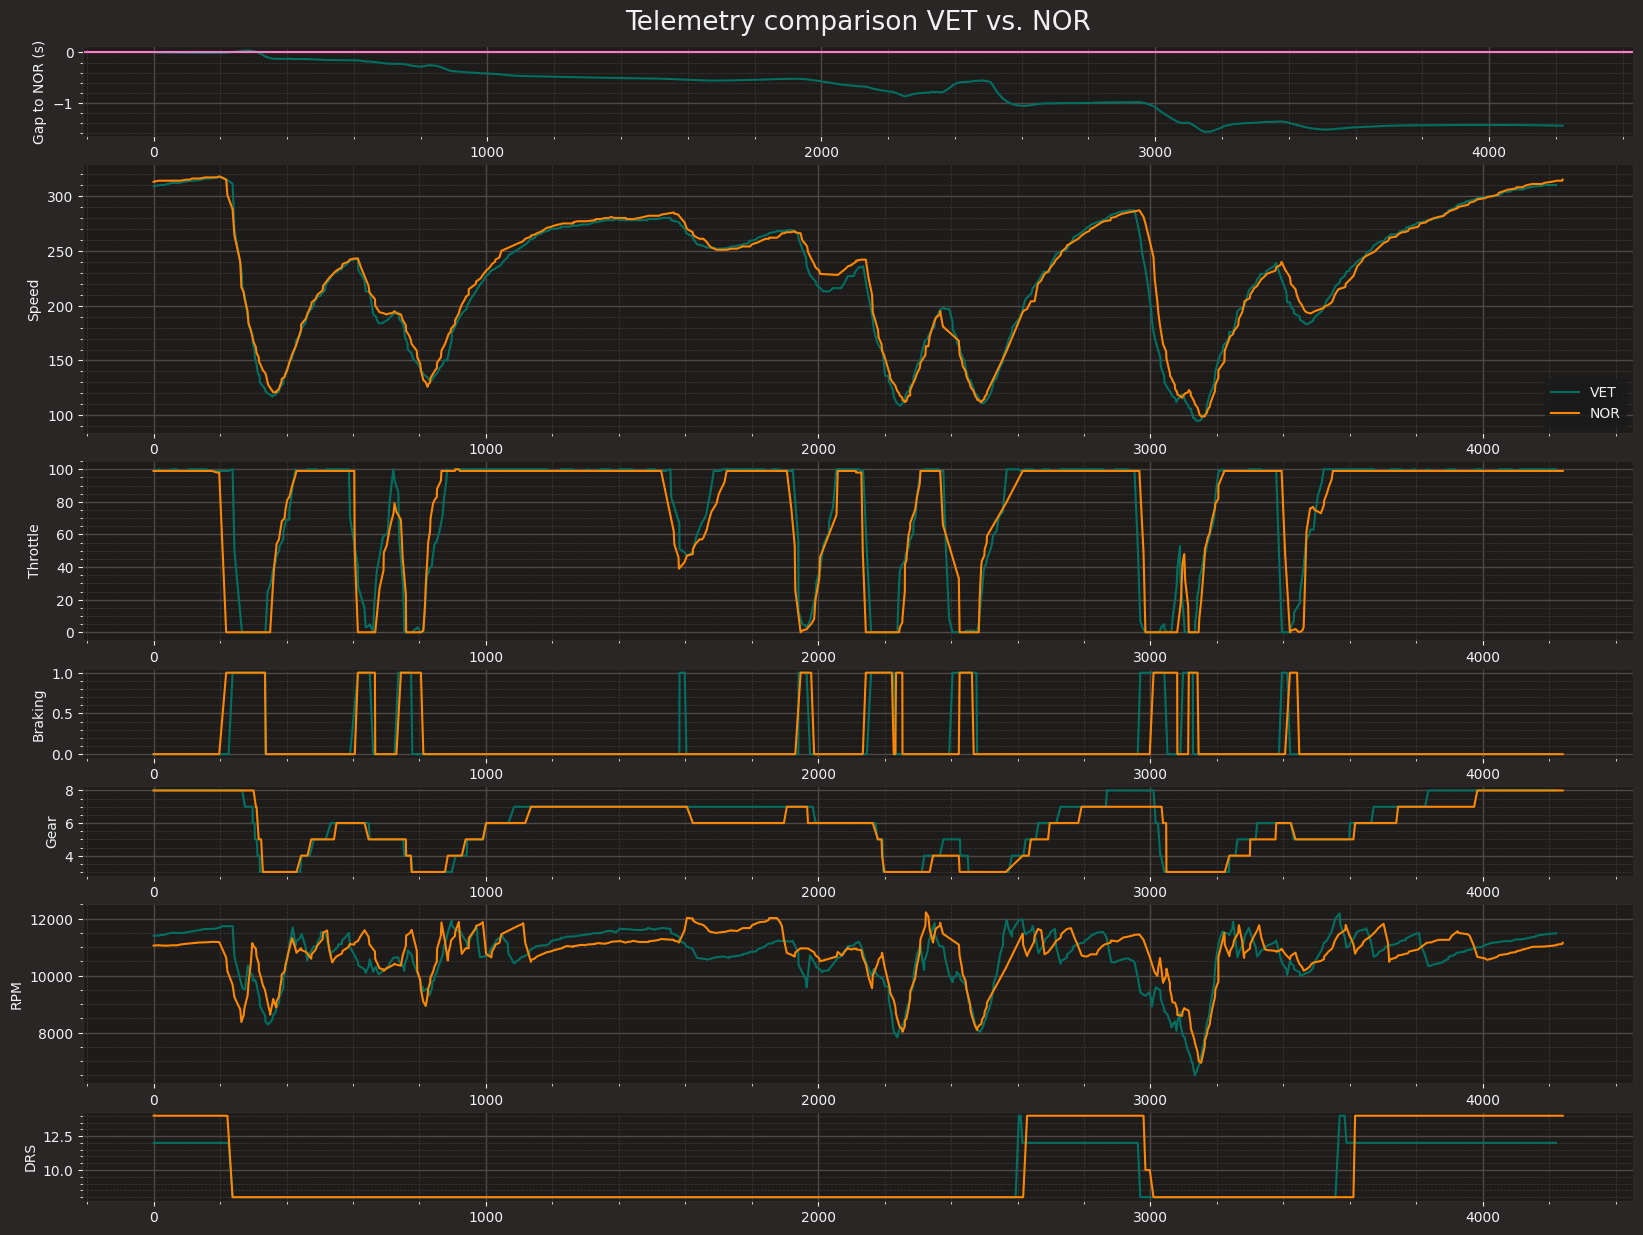

In [10]:
plt.rcParams['figure.figsize'] = [20, 15]

# 7 plots
# - Delta
# - Speed
# - THrottle
# - Braking
# - Gear
# - RPM
# - DRS
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': [1,3,2,1,1,2,1]})

# Set the title of the plot. 
ax[0].title.set_text(f'Telemetry comparison {driver_1} vs. {driver_2}')

# Subplot 1: The Delta
ax[0].plot(ref_tel['Distance'], delta_time, color=color_1)
# We want to add a middle line, the 0 line
ax[0].axhline(0)
ax[0].set(ylabel=f'Gap to {driver_2} (s)')

# Subplot 2: The Delta
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'],label=driver_1, color=color_1)
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2,color=color_2)

ax[1].set(ylabel='Speed')
ax[1].legend(loc='lower right')

# Subplot 3: Throttle
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'],label=driver_1, color=color_1)
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2,color=color_2)

ax[2].set(ylabel='Throttle')

# Subplot 4: Braking
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'],label=driver_1, color=color_1)
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2,color=color_2)

ax[3].set(ylabel='Braking')

# Subplot 5: Gear
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'],label=driver_1, color=color_1)
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2,color=color_2)

ax[4].set(ylabel='Gear')

# Subplot 6: RPM
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'],label=driver_1, color=color_1)
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2,color=color_2)

ax[5].set(ylabel='RPM')

# Subplot 6: DRS
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'],label=driver_1, color=color_1)
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2,color=color_2)

ax[6].set(ylabel='DRS')

## 2.2 Minisector comparison

In [11]:
#Merge the telemetry from both drivers into one dataframe
telemetry_driver_1['Driver'] = driver_1
telemetry_driver_2['Driver'] = driver_2

telemetry = pd.concat([telemetry_driver_1, telemetry_driver_2])

In [12]:
# Calculate the minisector
num_minisectors = 25
total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors

In [13]:
minisectors = [0]
for i in range(0, (num_minisectors -1 )):
    minisectors.append(minisector_length *(i + 1))

In [14]:
# Assign a minisector number to every row in trhe telemetry dataframe
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist:(
        int((dist // minisector_length) + 1)
    )
)

In [15]:
# Calculate minisector per driver
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()


In [16]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

In [17]:
#merge the fastest_driver dataframe to the telemetry dataframe on minisector
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])

In [26]:
telemetry.loc[telemetry['Fastest_driver'] == driver_1, 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == driver_2, 'Fastest_driver_int'] = 2


In [28]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)



In [30]:
#convert to points
points = np.array([x, y]).T.reshape(-1, 1, 2)

segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

fastest_driver_array

array([2., 2., 2., ..., 2., 2., 2.])

In [23]:
# the segments we juste created can now be coloroed  according to the fasted drvier in a minisecotr
cmap = ListedColormap([color_1, color_2])
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

RuntimeError: Can not put single artist in more than one figure

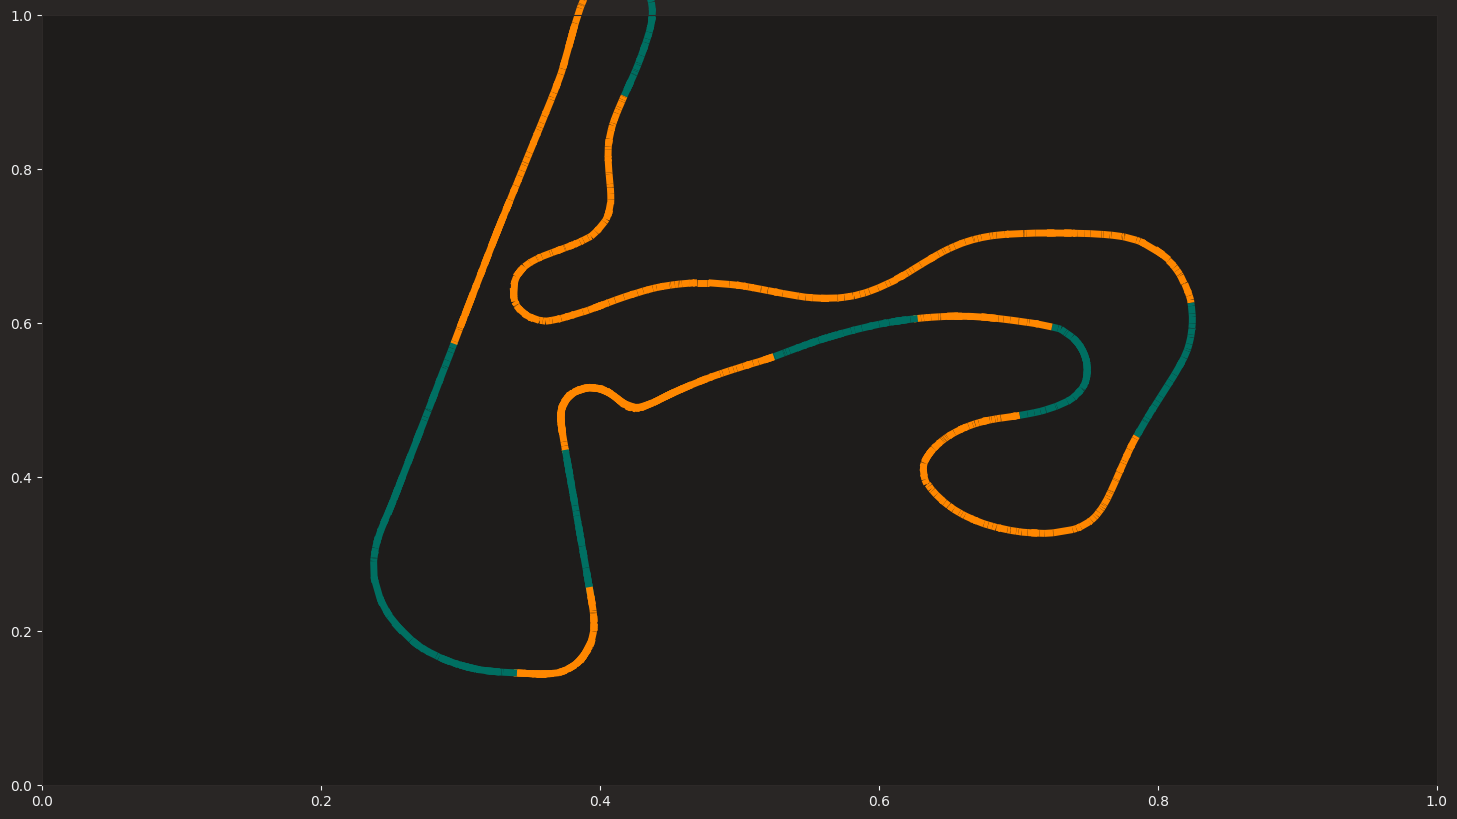

In [31]:
plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.box(False)
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# add a color bar fopr the legend
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1, 9))
cbar.set_ticklabels([driver_1, driver_2])